# MASW: reading and processing

Three objectives of this notebook : 
1. Read the SU data ontained by the MASW (Multiple-channel Analysis of Surface Wave) method
2. Diagram dispersion processing using the phase-shift method (Mokhtar 1988, Park 1998)
3. Realistic error calculation (O'Neill 2004)

Data used: 
C25 model measured at the bottom line (L4), date measured in MUSC (06/2020) 

## 1. Open SU data

The C25 model is one of a series two-layer epoxy-resin models designed during the thesis work of A. Wang. The data is obtained in the MUSC laboratory. Here we use the data measured in 06/2020, where the bottom surface of C25 is measured. 

It should be mentionned that, if SEG-2 data is used, the nessi package (developped by Damien Pageot) can be used to tranfert SEG-2 to SU. See "nessi_tuto" for more details.

In [1]:
# Import the SU data from the nessi.io module
from nessi.io import suread

# give the data file name
filename = "data/C25_L4_06-2020.su"

# Scan SU data, traces + headers
data = suread(filename)

## 2. Seismogram Plot

In [2]:
# copy data for signal processing
dobs = data.copy()

# operation option/keywork can be found in SU tutorial
dobs.operation(type='avg') # delete average values for each trace

The traces and the header information can be obtained by the nessi package.

In [3]:
# read sampling time information in header
# '0': first trace, keyword: 'dt', unity: [us]
dt = dobs.header[0]['dt']/1e6 
print("sampling time:", dt)

# read trace informations / seismogram
trace = dobs.traces
trace = trace.T # transpose matrix

ns, ntraces = trace.shape
print("total number of traces:", ntraces)
print("time vector length:", ns)

sampling time 0.0001
total number of traces: 91
time vector length: 6000


Time and space vectors are needed to present the seismogram. 

In [4]:
# import math package
import numpy as np

# time vector
t = np.linspace(0, (ns-1)*dt, ns)


# space vector 
dx = 1 # receiver space
offset = 12 # source to the first receiver space
x = np.linspace(offset, (ntraces-1)*dx+offset, ntraces)

Print the seismogram using the "wiggle" package (written by Mathieu Le Feuvre). "wiggle" plot is also available in "nessi" package.

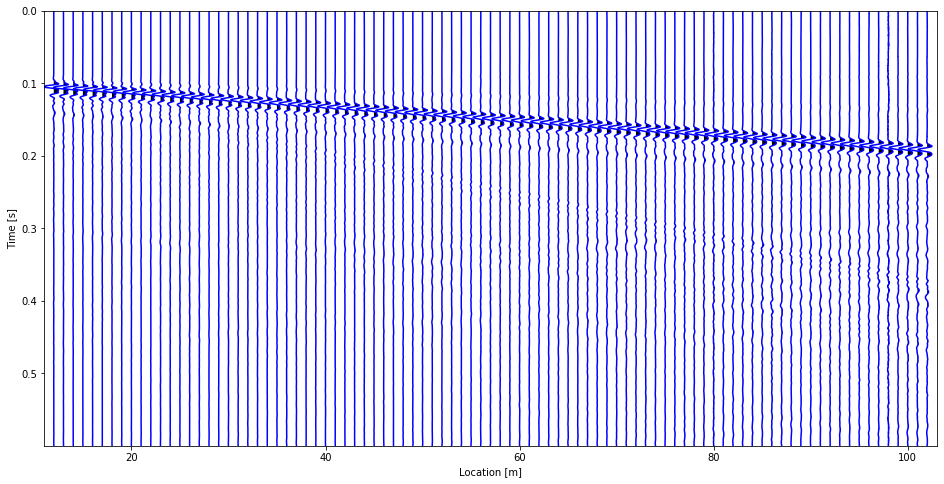

In [5]:
# import plot package
import matplotlib.pyplot as plt
# import wiggle package
from wiggle import wiggles

plt.figure(figsize=[16, 8])

wiggles(trace, t, x, plt.gca(), overlap=0, polarity=True, color=False, lineColor = 'blue', fill=True)

## 3. Processing

Use the phase-shift method to process the dispersion diagram in (f,v) domain. 

In [17]:
# import "diagram_v_f" package from "math_func.py" (written by A. Wang)
from math_func import diagram_v_f 

# frequency and velocity ranges for the dispersion diagram
fmin = 30; fmax = 150
vmin = 800; vmax = 1200; nv = 400

# velocity vector for the diagram plot
v = np.linspace(vmin, vmax, nv)

# export the frequency vector, phase velocity and dispersion diagram
f, vph, diagram = diagram_v_f(trace, x, t, fmin, fmax, vmax, vmin, nv)

# plot the dispersion diagram and the dispersion curve
plt.figure(figsize=[12,6])
plt.xlabel("Frequency [kHz]"); plt.ylabel("Phase Velocity [m/s]")

plt.plot(f, vph, color = "red", linestyle = "--", linewidth = 3)
fig = plt.contourf(f, v, diagram)
plt.colorbar(fig)

## 4. Realistic error

Realitic error is a function of the receiver length and the measured phase velocity, which measured the data uncertainty and is defined by O'Neill 2004. 

In [20]:
# import "realiste_error" from math_func.py
from math_func import realiste_error

xlength = x[-1] - x[0] # total length of receivers
err = realiste_error(vph, f, xlength)

# plot the realistic error on the dispersion diagram
plt.figure(figsize=[12,6])
plt.xlabel("Frequency [kHz]"); plt.ylabel("Phase Velocity [m/s]")

fig = plt.contourf(f, v, diagram)
plt.colorbar(fig)

plt.plot(f, vph, color = "red", linestyle = "--", linewidth = 3)
plt.errorbar(f, vph, yerr = err, color = "black")

<ErrorbarContainer object of 3 artists>

## References

Mokhtar, T. A., Herrmann, R., and Russell, D. (1988). Reviews of Seismic velocity and q model for the shallow structure of the arabian shield from short-period rayleigh waves. Geophysics , 53(11):13791387.

Park, C. B., Miller, R. D., and Xia, J. (1998). Imaging dispersion curves of surface waves on multi-channel record. In SEG Technical Program Expanded Abstracts 1998 , pages 13771380. Society of Exploration Geophysicists.

O'Neill, A. (2004). Shear velocity model appraisal in shallow surface wave inversion. In Symposium on the Application of Geophysics to Engineering and Environmental Problems 2004, pages 15441555. Society of Exploration
Geophysicists.